In [183]:
import numpy as np
import joblib

%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

import sys
sys.path.append("../")
sys.path.append("../../RARinterpret")
import lgpc
import RARinterpret

%load_ext autoreload
%autoreload 2


_X, x, weights, features, indxs = (joblib.load('../../RARinterpret/results/processed_cat.p')[p]
                           for p in ("X", "y", "weights", "features", "indxs"))
y = _X[:, -1]
z = _X[:, 0]

from scipy.stats import spearmanr

from scipy.stats import truncnorm, norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
spearmanr(x, y)

SpearmanrResult(correlation=0.6405480081064716, pvalue=2.6200553072847e-311)

In [185]:
zmin, zmax = z.min(), z.max()
Neval = 100
Nrepeat = 100


zeval = np.linspace(zmin, zmax, Neval)


width = 0.3


indxs = np.arange(z.size)
out = np.full((Neval, Nrepeat, 2), np.nan)

from tqdm import tqdm

for i in tqdm(range(Neval)):
    p = norm(zeval[i], width).pdf(z)
    p /= p.sum()
    for j in range(Nrepeat):
        choice = np.random.choice(indxs, size=N, replace=True, p=p)

        out[i, j, :] = spearmanr(x[choice], y[choice])

100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 14.61it/s]


<IPython.core.display.Javascript object>


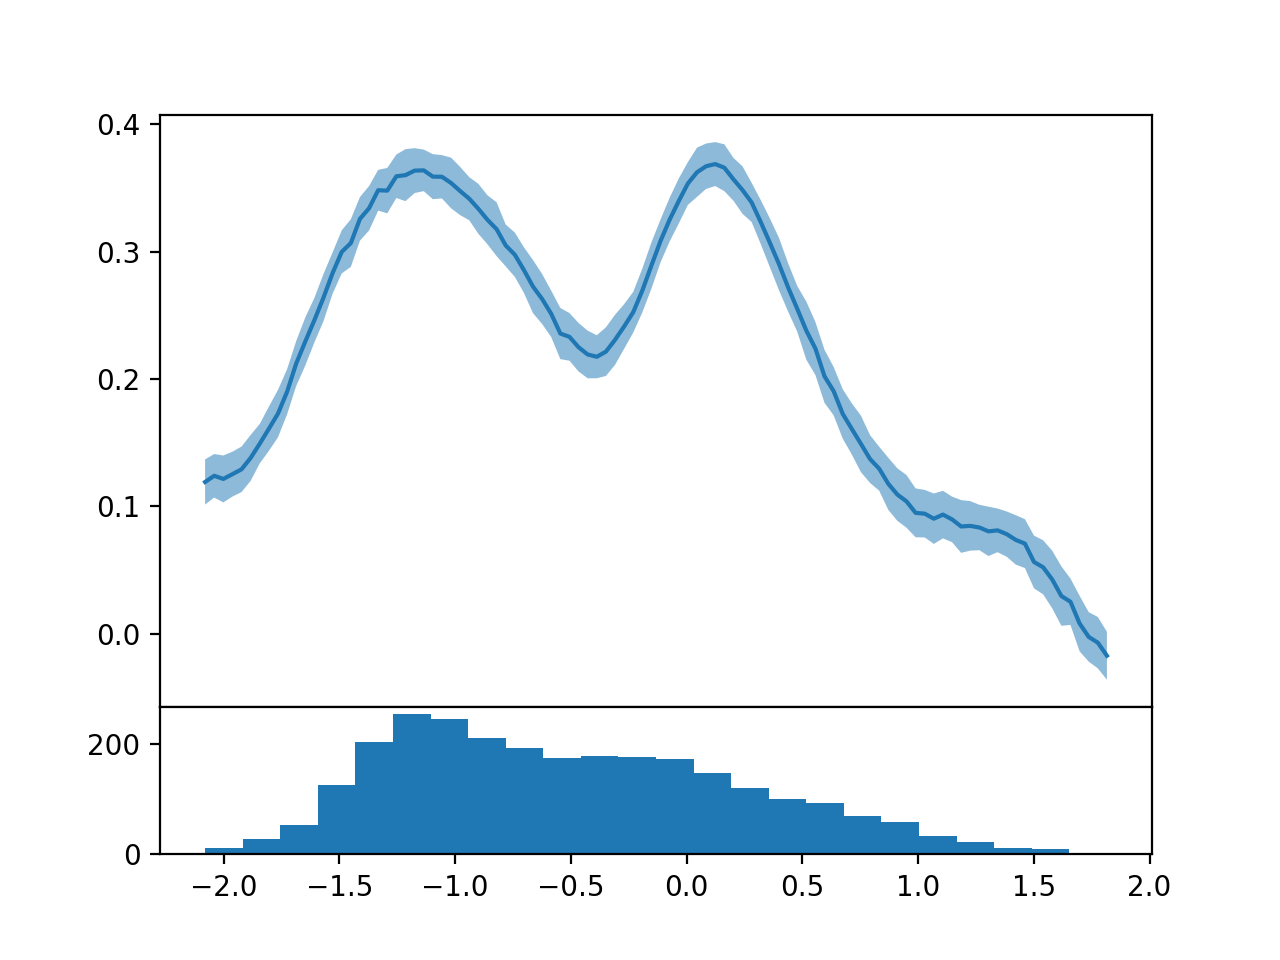

In [186]:
mu = np.mean(out[..., 0], axis=1)
std = np.std(out[..., 0], axis=1)

fig, ax = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": [1, 0.25]})
fig.subplots_adjust(hspace=0)
ax[0].plot(zeval, mu)
ax[0].fill_between(zeval, mu - std, mu + std, alpha=0.5)
# ax[0].plot(zeval, np.median(out[..., 1], axis=1))

ax[1].hist(z, bins="auto")


plt.show()

<IPython.core.display.Javascript object>


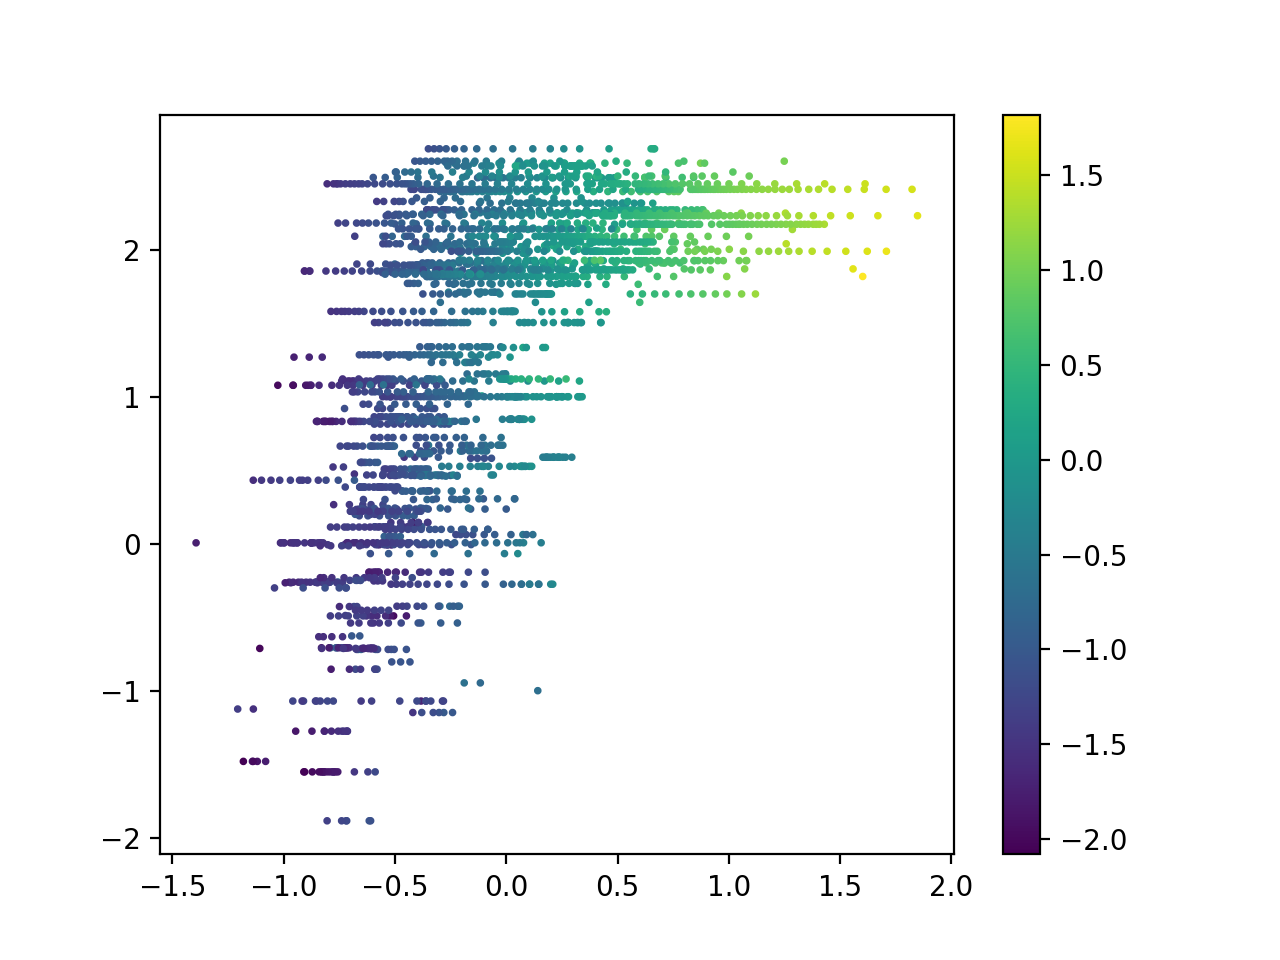

In [187]:


plt.figure()

m = (z > 1.5) & (z < 2)

plt.scatter(x, y, s=3, c=z)
plt.colorbar()

# plt.scatter(z, x, s=1)
# plt.scatter(z, y, s=1)

plt.show()

In [43]:
xmin, xmax

(-5, 5)

In [ ]:
dist.cdf()

In [58]:
dist2.cdf(xmax) - dist2.cdf(xmin)

0.9407816956693184

In [60]:
mu + xmin * width

-0.37445626465380283

In [ ]:
z.min(), z.max()

In [ ]:
features

In [ ]:
n_splits = 500
# GroupShuffle split mask
test_masks = RARinterpret.train_test_shuffle_mask(indxs, n_splits=n_splits, test_size=42,
                                                  random_state=42)

# Initialise arrays to store the data
N = y.size
_x = np.arange(N)
Xeval = np.linspace(X.min(), X.max(), 500).reshape(-1,1)
residuals = np.full((n_splits, N), np.nan)
scores = np.full(n_splits, np.nan)
yevals = np.full((n_splits, Xeval.shape[0]), np.nan)

gpr = GaussianProcessRegressor(kernel=RBF() + WhiteKernel(), n_restarts_optimizer=1, normalize_y=True)


# for i in tqdm(range(n_splits)):
#     _res, _score, _yeval = RARinterpret.residuals_gpr(
#         gpr, X, y, _x[~test_masks[i, :]], _x[test_masks[i, :]], weights, Xeval)
#     residuals[i, :] = _res
#     scores[i] = _score
#     yevals[i, :] = _yeval
    

# xeval = Xeval.reshape(-1)

In [ ]:
i = 0
res, score, yeval = lgpc.residuals_gpr(gpr, X, y, _x[~test_masks[i, :]], _x[test_masks[i, :]], weights, Xeval)

In [ ]:
lgpc